In [1]:
%matplotlib inline
import pandas as pd
import requests
import numpy as np
from pandas.io.json import json_normalize

In [2]:
##Dict of session:uri
FMlinkList = {'August':'https://www.commonsense.org/education/privacy/blog/digital-redlining-access-privacy',
        'September':'http://dmlcentral.net/speculative-design-for-emergent-learning-taking-risks/',
        'October':'http://marginalsyllab.us/wp-content/uploads/2016/08/PWFlow-Intro.pdf',
        'November':'https://helenbeetham.com/2016/11/14/ed-tech-and-the-circus-of-unreason/',
        'January':'http://marginalsyllab.us/the-school-and-social-progress-by-john-dewey/',
        'February':'http://marginalsyllab.us/preface-to-research-writing-rewired-lessons-that-ground-students-digital-learning-by-dawn-reed-and-troy-hicks/'}

In [70]:
##Create empty dataFrame, and append data scraped from annotation api
dfAll = pd.DataFrame(columns=['created', 'document.title', 'group', 'id', 'links.html',
       'links.incontext', 'links.json', 'permissions.admin',
       'permissions.delete', 'permissions.read', 'permissions.update',
       'references', 'tags', 'target', 'text', 'updated', 'uri', 'user','session'])
for session,link in FMlinkList.items():
    df = scrapeAPI(session,link)
    dfAll = dfAll.append(df)

January
http://marginalsyllab.us/the-school-and-social-progress-by-john-dewey/
Number of Records Found:  242
Scraped:
0
20
40
60
80
100
120
140
160
180
200
220
240
242
August
https://www.commonsense.org/education/privacy/blog/digital-redlining-access-privacy
Number of Records Found:  186
Scraped:
0
20
40
60
80
100
120
140
160
180
186
February
http://marginalsyllab.us/preface-to-research-writing-rewired-lessons-that-ground-students-digital-learning-by-dawn-reed-and-troy-hicks/
Number of Records Found:  121
Scraped:
0
20
40
60
80
100
120
121
September
http://dmlcentral.net/speculative-design-for-emergent-learning-taking-risks/
Number of Records Found:  87
Scraped:
0
20
40
60
80
87
November
https://helenbeetham.com/2016/11/14/ed-tech-and-the-circus-of-unreason/
Number of Records Found:  155
Scraped:
0
20
40
60
80
100
120
140
155
October
http://marginalsyllab.us/wp-content/uploads/2016/08/PWFlow-Intro.pdf
Number of Records Found:  159
Scraped:
0
20
40
60
80
100
120
140
159


In [73]:
dfAll.to_pickle('data/FM-Aug-Feb.pkl')

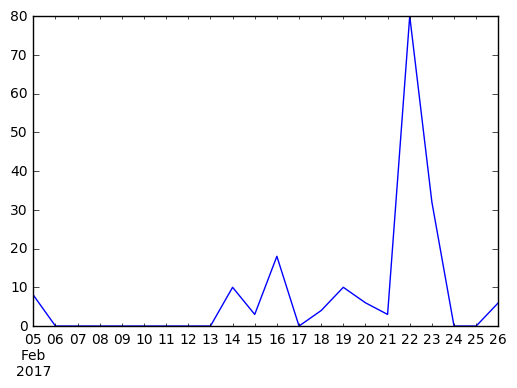

In [21]:
dfAll['2017-02'].groupby(pd.TimeGrouper('1D')).size().plot()

In [69]:
def scrapeAPI(session,uri):
    n = 0
    payload = {'url':uri}
    r = requests.get('https://hypothes.is/api/search',params=payload)
    df = pd.DataFrame(columns=['created', 'document.title', 'group', 'id', 'links.html',
       'links.incontext', 'links.json', 'permissions.admin',
       'permissions.delete', 'permissions.read', 'permissions.update',
       'references', 'tags', 'target', 'text', 'updated', 'uri', 'user'])
    total = r.json()['total']
    print(session)
    print(uri)
    print('Number of Records Found: ',total)
    print('Scraped:')
    while n < total:
        print(n)
        df = df.append(json_normalize(r.json()['rows']))
        n = len(df)
        payload = {
            'url':uri,
            'offset':n}
        r = requests.get('https://hypothes.is/api/search',params=payload)
    print(n)
    df['session'] = session
    df['updated'] = pd.to_datetime(df['updated'])
    df['created'] = pd.to_datetime(df['created'])
    df = df.set_index(df['created'])
    return df